In [1]:
from feature_extractors.HESIFT import *
import cv2
# Show the figures / plots inside the notebook
%matplotlib inline

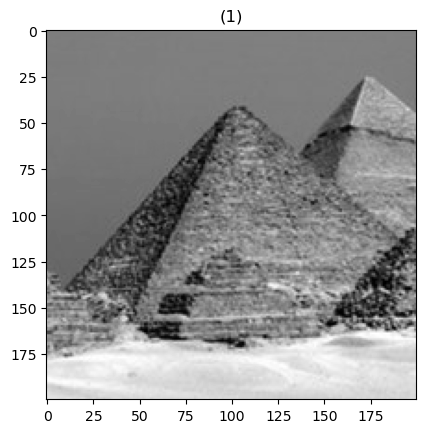

In [2]:
# Preparing the test image
pyramids = io.imread("images/pyramids.jpeg")
grayscale_pyramids = (rgb2gray(pyramids) * 255).astype(np.float32)
grayscale_pyramids = grayscale_pyramids[500:700, 200:400]
show_images([grayscale_pyramids])

In [3]:
baseImage = generateBaseImage(grayscale_pyramids, 2, 0).astype(np.int64)
num_octaves = computeNumberOfOctaves(baseImage.shape)
gaussian_kernels = generateGaussianKernels(0.4, 3)
encryptedBaseImage = encryptImage(baseImage)
encryptedBaseImage

Generating base image...
Generating Gaussian Kernels...


array([[2199941168, 2391190871, 3398535896, ..., 1448856129, 1433263568,
        2598283340],
       [1309051587,  295811161,  656293652, ...,  664227267, 1532684438,
        2983779056],
       [3373304231, 1167581616, 3079761243, ..., 3680619670, 2145361748,
        3352334891],
       ...,
       [3827162839, 1188684982, 2031982211, ..., 3774355943, 1475387746,
        4078787675],
       [3121504088, 2478899331, 2443922880, ..., 2226727425,  168221672,
        1811155049],
       [3644483044, 2442111568, 1947233892, ..., 3835037817, 2358256541,
         949428179]], dtype=uint64)

In [4]:
baseImage = generateBaseImage(grayscale_pyramids, 2, 0).astype(np.int64)
num_octaves = computeNumberOfOctaves(baseImage.shape)
gaussian_kernels = generateGaussianKernels(0.4, 3)
encryptedBaseImage = encryptImage(baseImage)
encryptedGaussianImages = generateEncryptedGaussianImages(encryptedBaseImage, num_octaves, gaussian_kernels)
encryptedDOGImages = generateEncryptedDoGImages(encryptedGaussianImages)
keypoints_duplicate = findDecryptedScaleSpaceExtrema(encryptedGaussianImages,encryptedDOGImages,3,0.4,5)
keypoints = removeDuplicateKeypoints(keypoints_duplicate)
keypoints = convertKeypointsToInputImageSize(keypoints)

Generating base image...
Generating Gaussian Kernels...
Generating Gaussian images...
Octave 1 Running:
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Octave 1 Done!!!
-----------------------------------------------------------------------
Octave 2 Running:
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Octave 2 Done!!!
-----------------------------------------------------------------------
Octave 3 Running:
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Octave 3 Done!!!
-----------------------------------------------------------------------
Octave 4 Running:
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Convolution Done!
Octave 4 Done!!!
-----------------------------------------------------------------------
Octave 5 Running:
Convolution Done!
Convolution Done!


In [23]:
len(keypoints)

212

In [20]:
# Draw keypoints on the image
keypoint_image = cv2.drawKeypoints(encryptImage(grayscale_pyramids).astype(np.uint8), keypoints, None)

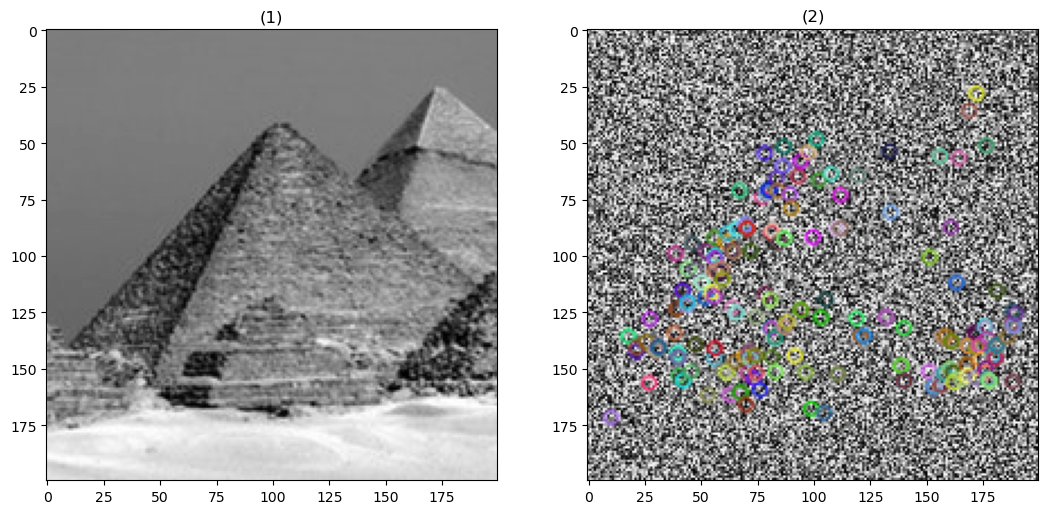

In [22]:
show_images([grayscale_pyramids, keypoint_image])

In [4]:
x=findDecryptedScaleSpaceExtrema(encryptedGaussianImages,encryptedDOGImages,3,0.7,5)


In [5]:
print(type(x[0]))
print(len(x))

<class 'cv2.KeyPoint'>
4688


In [ ]:
decryptedDOGImages = []
for octave in encryptedDOGImages:
    show_images(octave)
    decryptedOctave = []
    for image in octave:
        decryptedOctave.append(decryptImage(image))
    decryptedDOGImages.append(decryptedOctave)

In [ ]:
for octave in decryptedDOGImages:
    show_images(octave)

In [ ]:
for y in x:
    if y.pt==(210.5706787109375, 131.22010803222656):
        print(True)
     

In [ ]:
def isEncryptedPixelAnExtremumm(first_subimage, second_subimage, third_subimage, threshold):
    """Return True if the center element of the 3x3x3 input array is strictly greater than or less than all its neighbors, False otherwise
    """
    center_pixel_value = second_subimage[1, 1]
    tensor_center_pixel = np.full((3,3),center_pixel_value)
    tensor_neighbor_pixels = np.array([first_subimage,second_subimage,third_subimage])
    if center_pixel_value > threshold:
            local_maxima = tensor_homomorphicComparator(tensor_center_pixel,tensor_neighbor_pixels)
            if not local_maxima:
                return tensor_homomorphicComparator(tensor_center_pixel,tensor_neighbor_pixels,False)
            return local_maxima

    return False

In [ ]:
image_1 = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
image_2 = np.array([[9, 8, 7],
                   [6, 8, 4],
                   [3, 2, 1]])
image_3 = np.array([[11, 12, 13],
                   [14, 15, 16],
                   [17, 18, 19]])

cipher1 = encryptImage(image_1)
cipher2 = encryptImage(image_2)
cipher3 = encryptImage(image_3)

print(isEncryptedPixelAnExtremumm(cipher1,cipher2,cipher3,0))